In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("DATA/score_info.json", "r") as f:
    score_info = json.load(f)

In [3]:
score_info

{'P-7-northpole': {'hips': [75097, 72607, 70692, 69112, 62561],
  'ras': [230.1822884, 222.67664751, 216.88134383, 212.21253759, 192.2782968],
  'decs': [71.83397308, 74.15547596, 75.69593921, 77.54743312, 83.41779443],
  'mags': [3.0, 2.07, 4.25, 4.8, 5.92],
  'stypes': ['A3II-III    ',
   'K4IIIvar    ',
   'K4III       ',
   'K3III       ',
   'A0V         '],
  'mults': [' 1', ' 1', ' 1', ' 1', ' 1'],
  'dists': [22396693.748740375,
   13814946.920733849,
   9880725.761906888,
   17754143.504798643],
  'common_name': ['* gam UMi \n*  13 UMi \nV* gam UMi \nSV* ZI  1129 \nNAME Pherkad \n',
   '*   7 UMi \n* bet UMi \nNAME Kochab \nSV* ZI  1097 \n',
   '*   5 UMi \n',
   '*   4 UMi \n',
   '']},
 'P-6-fourad': {'hips': [51384, 51502, 47193],
  'ras': [157.42586771, 157.77091914, 144.27229969],
  'decs': [84.25210531, 82.55853791, 81.32642085],
  'mags': [5.52, 5.25, 4.28],
  'stypes': ['F0IV        ', 'F2V         ', 'K3III       '],
  'mults': [' 1', ' 1', ' 1'],
  'dists': [3984205.

In [9]:
info_parsed = {}
for name in score_info.keys():
    info_parsed[name] = {
        "mag_sizes":[],
        "stypes":[],
        "mults": [],
        #"dist_exps": [], 
    }

In [10]:
stype_map= {
    "W": "bounce",
    "O": "7stroke",
    "B": "para",
    "A": "single",
    "F": "5stroke",
    "G": "drag",
    "K": "flam", 
    "M": "6stroke"
}

In [11]:
from math import log10, floor, isnan

def find_exp(number) -> int:
    base10 = log10(abs(number))
    return abs(floor(base10))

In [12]:
for name, value in score_info.items(): 
    
    #mag: scale from 15 to 5, for -1.44 to 7.97
    info_parsed[name]["mag_sizes"] = [-10/(7.97+1.44) * (x+1.44) + 15 for x in value["mags"]]
    
    #stypes: map by first letter
    stypes = [x[0] for x in value["stypes"]]
    info_parsed[name]["stypes"] = [stype_map[x] for x in stypes]
    
    #mults: take value
    info_parsed[name]["mults"] = value["mults"]
    
    #dist exp: get exponent (need to fix this...)
    #dist_exps = []
    #for d in value["dists"]:
     #   if not isnan(d): 
     #       dist_exps.append(find_exp(d))
    #info_parsed[name]["dist_exps"] = dist_exps

In [8]:
with open("DATA/score_stars/score_info_parsed.json", "w") as f:
    json.dump(info_parsed, f)

In [13]:
info_parsed

{'P-7-northpole': {'mag_sizes': [10.28161530286929,
   11.269925611052074,
   8.953241232731138,
   8.368756641870352,
   7.178533475026569],
  'stypes': ['single', 'flam', 'flam', 'flam', 'single'],
  'mults': [' 1', ' 1', ' 1', ' 1', ' 1']},
 'P-6-fourad': {'mag_sizes': [7.603613177470778,
   7.890541976620618,
   8.921360255047821],
  'stypes': ['5stroke', '5stroke', 'flam'],
  'mults': [' 1', ' 1', ' 1']},
 'P-5-curvedarray': {'mag_sizes': [8.910733262486715,
   8.995749202975558,
   8.846971307120086,
   11.376195536663126,
   8.963868225292243,
   8.475026567481404],
  'stypes': ['single', 'drag', 'single', '5stroke', 'flam', 'flam'],
  'mults': [' 1', ' 1', ' 1', ' 1', ' 1', ' 1']},
 'P-4-greatemp': {'mag_sizes': [7.869287991498408],
  'stypes': ['para'],
  'mults': [' 1']},
 'P-15-celestpill': {'mag_sizes': [7.359192348565357,
   7.189160467587674,
   6.880977683315622,
   8.039319872476089,
   6.976620616365569],
  'stypes': ['single', 'para', '6stroke', 'single', 'flam'],
  '

In [14]:

#make list of asterisms w/ info (easier)
asterisms = []

for name, value in info_parsed.items():
    asterism = [name]
    for i in range(len(value["mag_sizes"])):
        star = [value['mag_sizes'][i], value['stypes'][i], value['mults'][i]]
        asterism.append(star)
    #asterism.append(value["dist_exps"])
    asterisms.append(asterism)

In [15]:
asterisms[7]

['P-14-offarchs', [8.985122210414453, 'single', ' 2']]

In [48]:
color_map = {
    "P":to_rgb("purple"),
    "B":to_rgb("blue"),
    "R":to_rgb("red"),
    "W":to_rgb("grey"),
    "K":to_rgb("green"),
}

In [ ]:
Y=255 - P*(255-X) 

In [35]:
from matplotlib.colors import to_rgb, rgb_to_hsv

In [26]:
from matplotlib.colors import hsv_to_rgb

In [17]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [18]:
asterisms.sort(key=lambda x : (x[0].split("-")[0], int(x[0].split("-")[1])))

In [220]:
asterisms[239]

['R-57-lowerstep',
 [9.760892667375135, 'flam', ' 1'],
 [9.442082890541975, 'drag', 1]]

In [60]:
defaults = []

In [61]:
#make a default star

defaults.append(["P-default", [10., 'none', '1']] )
defaults.append(["K-default", [10., 'none', '1']] )
defaults.append(["B-default", [10., 'none', '1']] )
defaults.append(["R-default", [10., 'none', '1']] )
defaults.append(["W-default", [10., 'none', '1']] )

In [19]:
asterisms[239][2][2] = 1

P-default 1 DATA/score_stars/P/P-default.png
K-default 1 DATA/score_stars/K/K-default.png
B-default 1 DATA/score_stars/B/B-default.png
R-default 1 DATA/score_stars/R/R-default.png
W-default 1 DATA/score_stars/W/W-default.png


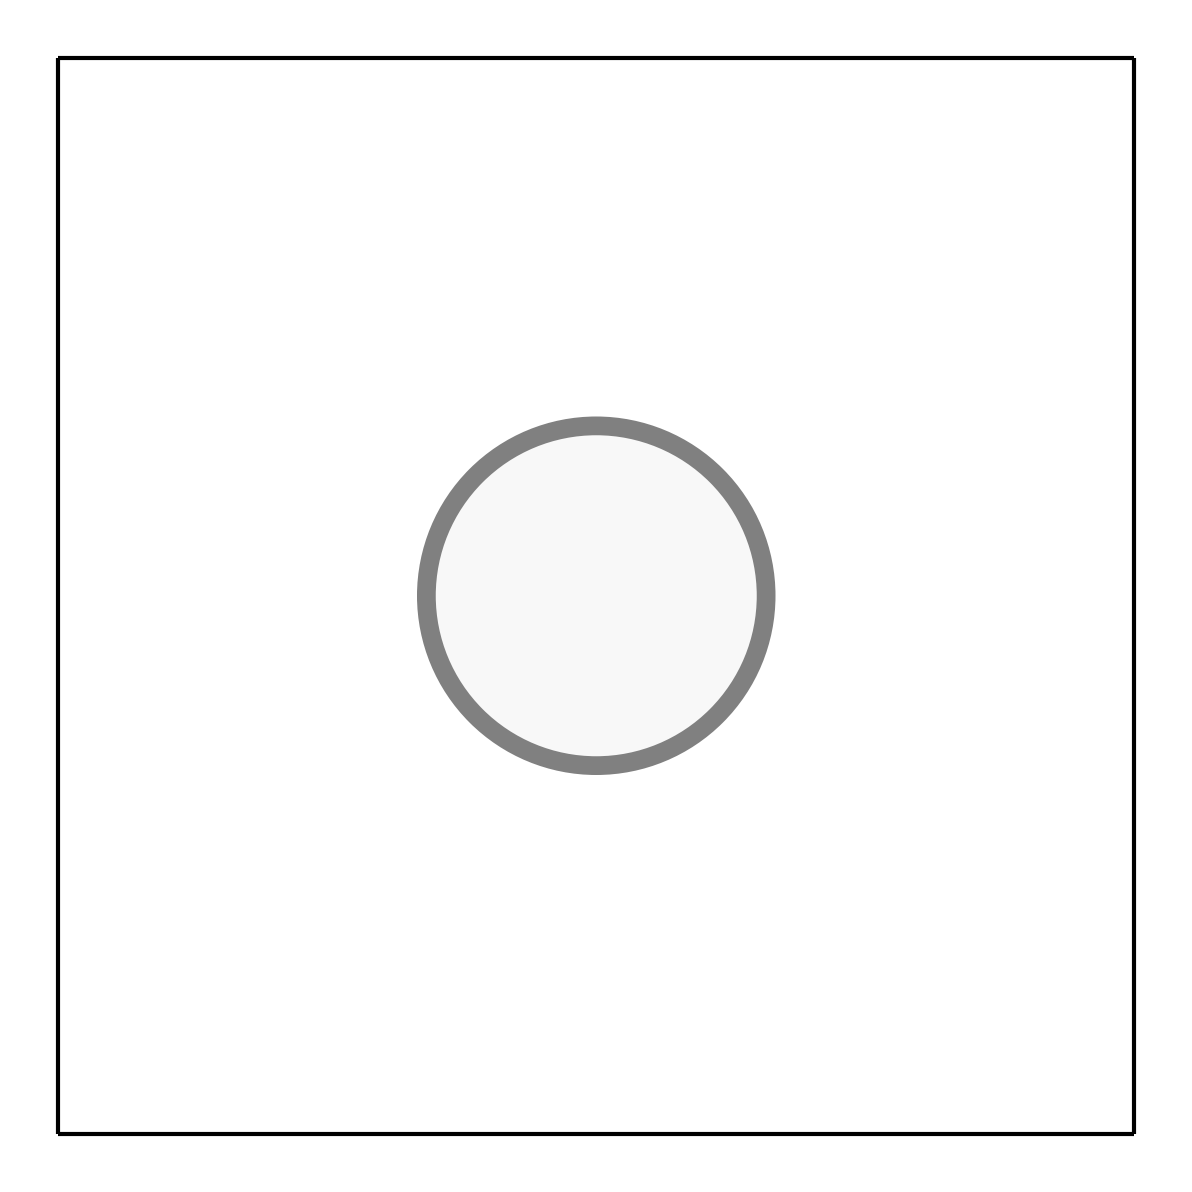

In [63]:
#make the STAR MARKER for each star (keep everything same size!!!!!!)
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for aster in defaults:
    
    aster_name = aster[0]
    num_stars = len(aster) - 1
    color = color_map[aster_name[0]]
    
    for i in range(1, num_stars+1):
        

        star_info = aster[i]
        
        size = star_info[0] #also have size affect alpha
        
        size=6
        
        a = (size - 5)/20 
        tech = star_info[1]
        mult = int(star_info[2])
        
        print(aster_name, i, end=" ")
        
        ax.clear()
        
        #mult=3
        
        #tech = "bounce"
        
        linewidth = 3*size/4

        #plot a square for sizing purposes
        ax.hlines(y=19, xmin=-19, xmax=19, linewidth=1, color="k")
        ax.hlines(y=-19, xmin=-19, xmax=19, linewidth=1, color="k")
        ax.vlines(x=19, ymin=-19, ymax=19, linewidth=1, color="k")
        ax.vlines(x=-19, ymin=-19, ymax=19, linewidth=1, color="k")
        
        

        
        #add main circle of size
        
        #inner_color = hsv_to_rgb((color_map[aster_name[0]], a*100, 100))

        
        circle1 = plt.Circle((0, 0), size, color=color, alpha = a) #alpha = a)
        
 
        
        
        circle2 = plt.Circle((0, 0), size, color=color, fill=False, linewidth=linewidth)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        
        
        #add concentric circles for mult 
        if int(mult) == 2:
            
            circle3 = plt.Circle((0, 0), size*8/10, color=color, fill=False, linewidth=linewidth)
            ax.add_patch(circle3)
            
        elif int(mult) == 3:
            circle3 = plt.Circle((0, 0), size*8/10, color=color, fill=False, linewidth=linewidth)
            circle4 = plt.Circle((0, 0), size*6/10, color=color, fill=False, linewidth=linewidth)
            ax.add_patch(circle3)
            ax.add_patch(circle4)
            
            
        if tech == "single":
            ax.hlines(y=0, xmin=-size*12/10, xmax = size*12/10, color=color, linewidth = linewidth)
        
        elif tech == "para":
            ax.hlines(y=size/5, xmin=-size*12/10, xmax = size*12/10, color=color, linewidth = linewidth)
            ax.hlines(y=-size/5, xmin=-size*12/10, xmax = size*12/10, color=color, linewidth = linewidth)
            
        elif tech == "flam":
            ax.hlines(y=0, xmin=-size*12/10, xmax=-size*12/10 + size*(1+mult)/5, 
                      color=color, linewidth=linewidth)
            
        elif tech == "drag":
            ax.hlines(y=size/7, xmin=-size*12/10, xmax=-size*12/10 + size*(1+mult)/5, 
                      color=color, linewidth=linewidth)
            ax.hlines(y=-size/7, xmin=-size*12/10, xmax=-size*12/10 + size*(1+mult)/5, 
                      color=color, linewidth=linewidth)
            
        elif tech == "5stroke":
            ax.vlines(x=0, ymax=size*12/10, ymin=size*12/10-size*(1+mult)/5, color=color, linewidth=linewidth)
            
            point1 = (0, size*12/10)
            point2 = (0, size*12/10-size*(1+mult)/5)
            origin = (0, 0)
            
            for j in range(1, 5):
                angle = j * np.pi *2 / 5
                rot1 = rotate(origin, point1, angle)
                rot2 = rotate(origin, point2, angle)
                x, y = zip(rot1, rot2)
                ax.plot(x, y, color=color, linewidth=linewidth)
                
        elif tech == "6stroke":
            ax.vlines(x=0, ymax=size*12/10, ymin=size*12/10-size*(1+mult)/5, color=color, linewidth=linewidth)
            
            point1 = (0, size*12/10)
            point2 = (0, size*12/10-size*(1+mult)/5)
            origin = (0, 0)
            
            for j in range(1, 6):
                angle = j * np.pi *2 / 6
                rot1 = rotate(origin, point1, angle)
                rot2 = rotate(origin, point2, angle)
                x, y = zip(rot1, rot2)
                ax.plot(x, y, color=color, linewidth=linewidth)
                
        
        elif tech == "7stroke":
            ax.vlines(x=0, ymax=size*12/10, ymin=size*12/10-size*(1+mult)/5, color=color, linewidth=linewidth)
            
            point1 = (0, size*12/10)
            point2 = (0, size*12/10-size*(1+mult)/5)
            origin = (0, 0)
            
            for j in range(1, 7):
                angle = j * np.pi *2 / 7
                rot1 = rotate(origin, point1, angle)
                rot2 = rotate(origin, point2, angle)
                x, y = zip(rot1, rot2)
                ax.plot(x, y, color=color, linewidth=linewidth)
                
                
        elif tech == "bounce": 
            point1 = (0, size*12/10)
            point2 = (0, size*12/10-size*(1+mult)/5)
            origin = (0, 0)
            
            angle1 = np.pi/8
            rot11 = rotate(origin, point1, angle1) #(x, y) on top
            rot21 = rotate(origin, point2, angle1) #(x, y) on bottom
            
            x = (rot11[0]-rot21[0]/2)
            
            #ax.vlines(x=x, ymin=rot21[1], ymax=rot11[1], color=color, linewidth=size/8)
            #ax.vlines(x=-x, ymin=rot21[1], ymax=rot11[1], color=color, linewidth=size/8)
            
            ax.plot([x, rot11[0]], [rot21[1], rot11[1]], "-", color=color, linewidth=linewidth)
            ax.plot([-x, -rot11[0]], [rot21[1], rot11[1]], "-", color=color, linewidth=linewidth)
            ax.plot([-x, rot11[0]], [rot21[1], rot11[1]], "-", color=color, linewidth=linewidth)
            
#             angle2 = -np.pi/8
#             rot21 = rotate(origin, point1, angle2)
#             rot22 = rotate(origin, point2, angle2)
#             x, y = zip(rot21, rot22)
#             ax.plot(x, y, color=color, linewidth=size/8)

                
        ax.set_xlim(-20, 20)
        ax.set_ylim(-20, 20)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(False)
        
        ax.set_aspect(1)

        filename = "DATA/score_stars/" + aster_name[0] + "/" + aster_name  + ".png"
        plt.savefig(filename, dpi=300, bbox_inches="tight", transparent=True)
        print(filename)
    

In [32]:
import glob
quadrants = glob.glob("DATA/score_stars/*")

asters = []

for quadrant in quadrants:
    asters += glob.glob(quadrant + "/*")

In [33]:
for aster in asters:
    if ".png" in aster:
        asters.remove(aster)

In [51]:
stars = []

for aster in asters:
    stars += glob.glob(aster + "/*_cropped.png")

In [53]:
len(stars)

1211

In [45]:
for star in stars:
    if "_cropped" in star:
        stars.remove(star)

In [46]:
len(stars)

1211

In [47]:
stars.sort(key = lambda x: (x.split("/")[3].split("-")[0], int(x.split("/")[3].split("-")[1]), 
                            int(x.split("/")[4].split(".")[0])))

In [64]:
default = ["DATA/score_stars/P/P-default.png",
          "DATA/score_stars/B/B-default.png",
          "DATA/score_stars/K/K-default.png",
          "DATA/score_stars/W/W-default.png",
          "DATA/score_stars/R/R-default.png"]

In [48]:
stars

['DATA/score_stars/B/B-2-leftwall/1.png',
 'DATA/score_stars/B/B-2-leftwall/2.png',
 'DATA/score_stars/B/B-2-leftwall/3.png',
 'DATA/score_stars/B/B-2-leftwall/4.png',
 'DATA/score_stars/B/B-2-leftwall/5.png',
 'DATA/score_stars/B/B-2-leftwall/6.png',
 'DATA/score_stars/B/B-2-leftwall/7.png',
 'DATA/score_stars/B/B-2-leftwall/8.png',
 'DATA/score_stars/B/B-2-leftwall/9.png',
 'DATA/score_stars/B/B-2-leftwall/10.png',
 'DATA/score_stars/B/B-2-leftwall/11.png',
 'DATA/score_stars/B/B-3-rightwall/1.png',
 'DATA/score_stars/B/B-3-rightwall/2.png',
 'DATA/score_stars/B/B-3-rightwall/3.png',
 'DATA/score_stars/B/B-3-rightwall/4.png',
 'DATA/score_stars/B/B-3-rightwall/5.png',
 'DATA/score_stars/B/B-3-rightwall/6.png',
 'DATA/score_stars/B/B-3-rightwall/7.png',
 'DATA/score_stars/B/B-3-rightwall/8.png',
 'DATA/score_stars/B/B-3-rightwall/9.png',
 'DATA/score_stars/B/B-3-rightwall/10.png',
 'DATA/score_stars/B/B-3-rightwall/11.png',
 'DATA/score_stars/B/B-4-tianji/1.png',
 'DATA/score_stars/B/

In [66]:
from PIL import Image

In [67]:
for star in default: 
    im = Image.open(star)
    
    #im.show()
    
    width, height = im.size
    
    if width == 1192 and height == 1192:
    
        crop_amount = 70
        left = crop_amount
        top = crop_amount
        right = width - crop_amount
        bottom = height - crop_amount

        im1 = im.crop((left, top, right, bottom))

        #im1.show()
        filename = star.split(".")[0] + "_cropped.png"
        print(filename)
        im1.save(filename, 'PNG', transparent=0)
    
    else:
        print("WRONG SIZE", filename)

DATA/score_stars/P/P-default_cropped.png
DATA/score_stars/B/B-default_cropped.png
DATA/score_stars/K/K-default_cropped.png
DATA/score_stars/W/W-default_cropped.png
DATA/score_stars/R/R-default_cropped.png


In [ ]:


 
# Opens a image in RGB mode
im = Image.open(r"C:\Users\Admin\Pictures\geeks.png")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

In [22]:
len(stars)

1211

In [246]:
sum = 0

for aster in asterisms:
    sum += len(aster) - 1

In [247]:
sum

1211

In [268]:
asters.sort(key = lambda x: (x.split("/")[3].split("-")[0], int(x.split("/")[3].split("-")[1])))

In [289]:
missed = []

for folder, stars in zip(asters, asterisms):
    num_stars = len(stars) - 1
    num_files = len(glob.glob(folder + "/*"))
    
    print(num_files == num_stars)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
